In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
safedata = pd.read_csv('../Processed_Data/AQI_Final.csv')
data = pd.read_csv('../Processed_Data/AQI_Final.csv')

In [4]:
def randomRF(State_Name):
    #safedata = pd.read_csv('../Processed_Data/AQI_Final.csv')
    data = pd.read_csv('../Processed_Data/AQI_Final.csv')
    # Filter the state
    data = data[data['State Name'] == State_Name]
    
    # Drop non-numeric and irrelevant columns for prediction (e.g., 'State Name' and 'Year')
    #safedata = safedata.drop(columns=[ 'Unknown Fuel','Ethanol/Flex (E85)', 'Diesel', 'Hybrid Electric (HEV)', 
    #                        'Electric (EV)','Biodiesel' ,'Compressed Natural Gas (CNG)', 'Gasoline', 'Plug-In Hybrid Electric (PHEV)', ])

    data = data.drop(columns=[ 'Year','State Name' ])

    # Check for missing values and fill or drop them as needed
    if data.isnull().sum().sum() > 0:
        data = data.fillna(data.mean())  # Fill missing values with column means (alternative: data.dropna())

    # Split data into features (X) and target (y)
    X = data.drop(columns=['Overall AQI'])  # Features
    y = data['Overall AQI']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features to improve model performance
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # 45-degree line
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(f'Actual vs Predicted AQI for {State_Name} ')
    plt.show()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model Performance for {State_Name}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")

    # Optional: Feature Importance
    feature_importances = pd.DataFrame(model.feature_importances_, index=data.drop(columns=['Overall AQI']).columns, columns=['Importance']).sort_values('Importance', ascending=False)
    #print("\nFeature Importances:")
    #print(feature_importances)
    merge = pd.merge(safedata,data, how='inner')
    #print(merge)
    return mse, r2, mae

In [5]:
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", 
    "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maryland", 
    "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
    "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", 
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", 
    "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

year = [2016,2017,2018,2019,2020,2021,2022]


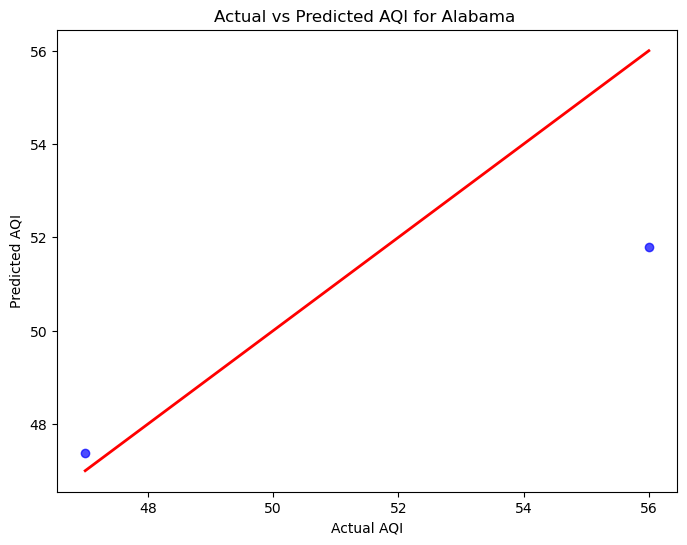

Model Performance for Alabama
Mean Squared Error: 8.888450000000011
Mean Absolute Error: 2.285
R^2 Score: 0.5610641975308637


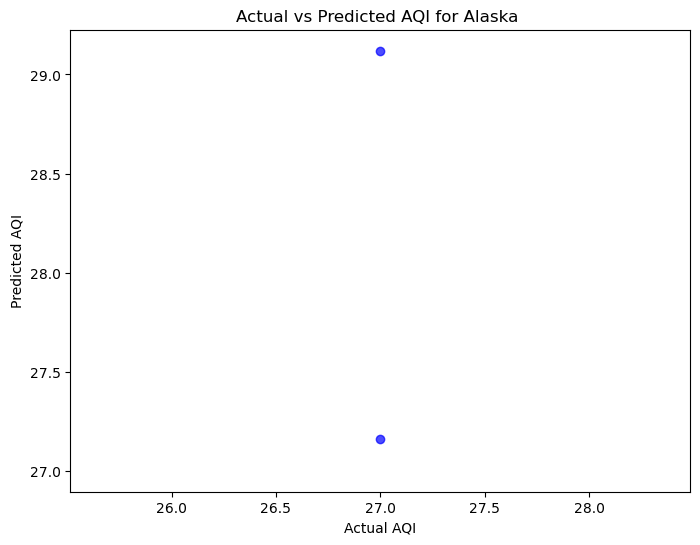

Model Performance for Alaska
Mean Squared Error: 2.260000000000002
Mean Absolute Error: 1.1400000000000006
R^2 Score: 0.0


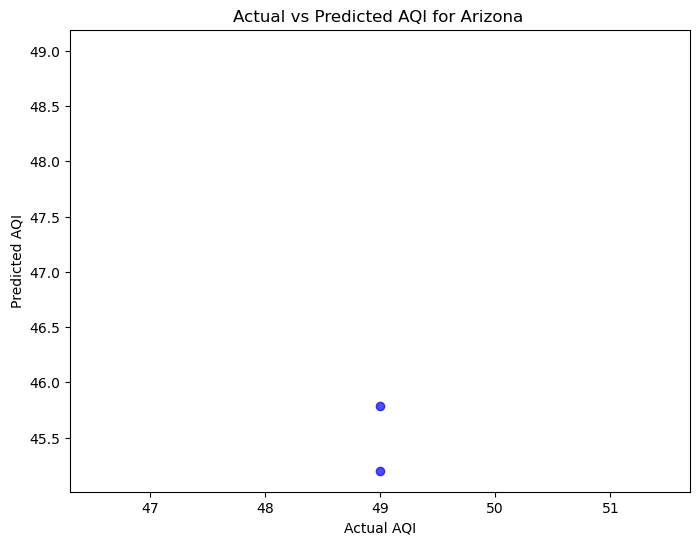

Model Performance for Arizona
Mean Squared Error: 12.37204999999999
Mean Absolute Error: 3.504999999999999
R^2 Score: 0.0


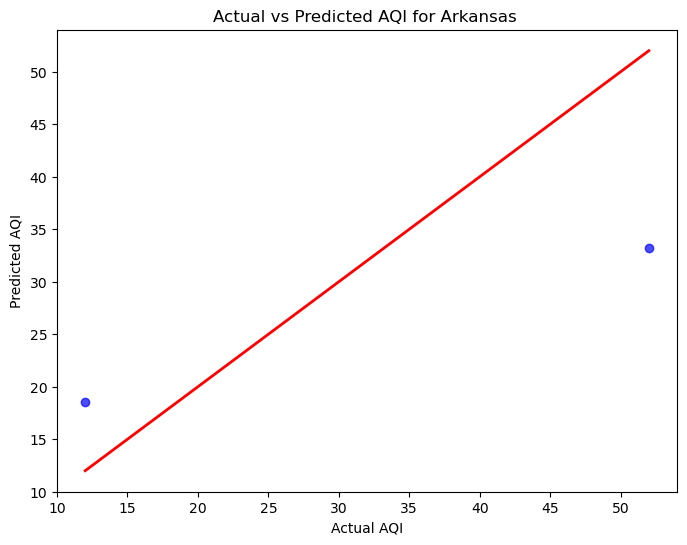

Model Performance for Arkansas
Mean Squared Error: 198.81025
Mean Absolute Error: 12.705
R^2 Score: 0.502974375


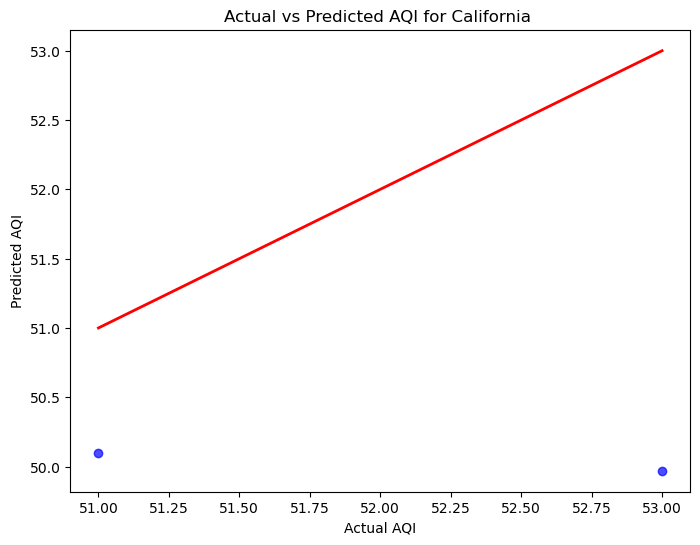

Model Performance for California
Mean Squared Error: 4.995450000000002
Mean Absolute Error: 1.9649999999999999
R^2 Score: -3.9954500000000017


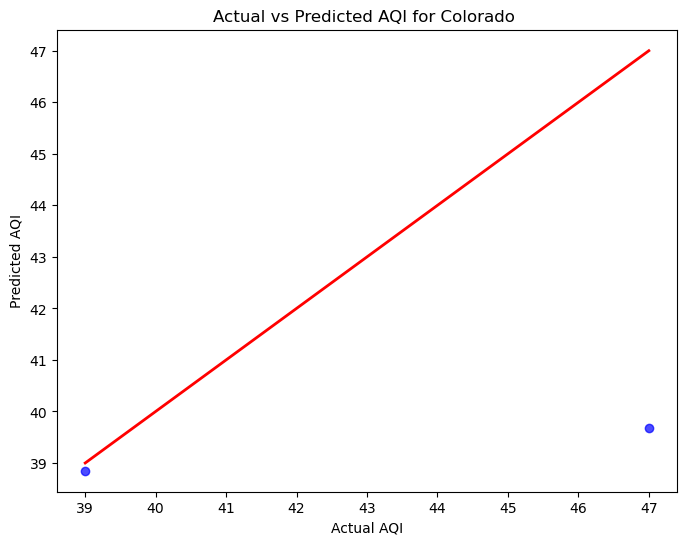

Model Performance for Colorado
Mean Squared Error: 26.802450000000004
Mean Absolute Error: 3.7349999999999994
R^2 Score: -0.6751531250000002


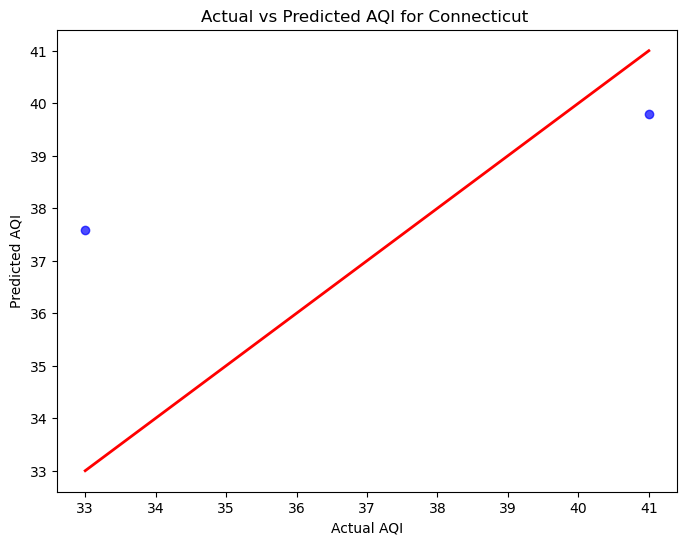

Model Performance for Connecticut
Mean Squared Error: 11.208199999999996
Mean Absolute Error: 2.8900000000000006
R^2 Score: 0.29948750000000024


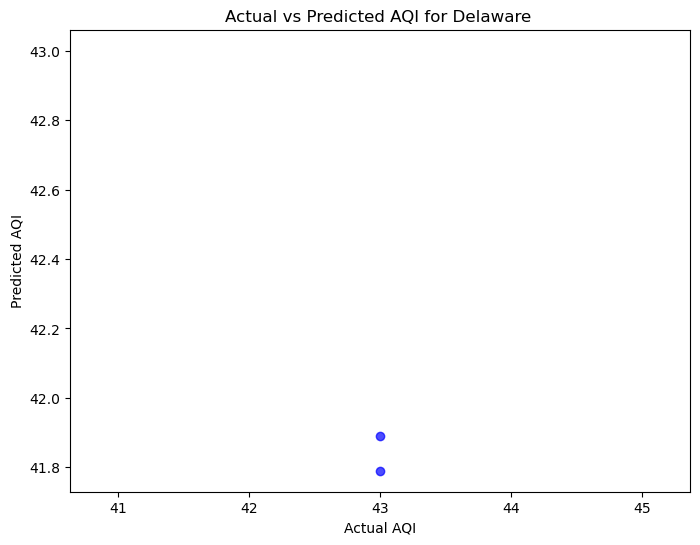

Model Performance for Delaware
Mean Squared Error: 1.3481000000000003
Mean Absolute Error: 1.1600000000000001
R^2 Score: 0.0


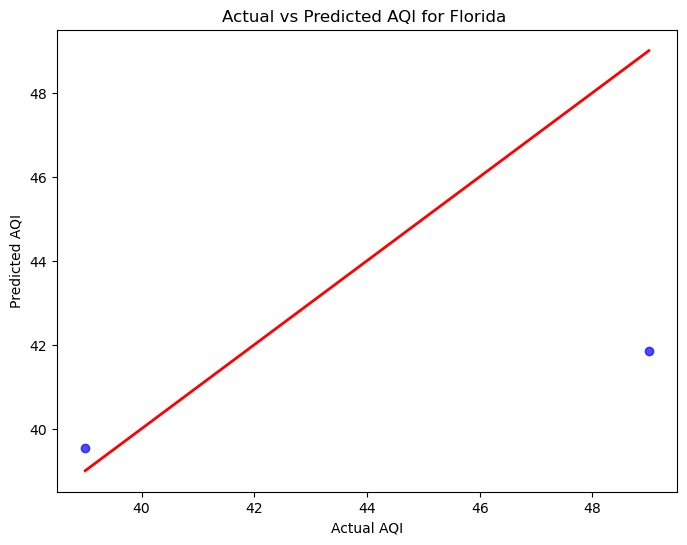

Model Performance for Florida
Mean Squared Error: 25.630250000000004
Mean Absolute Error: 3.835000000000001
R^2 Score: -0.025210000000000177


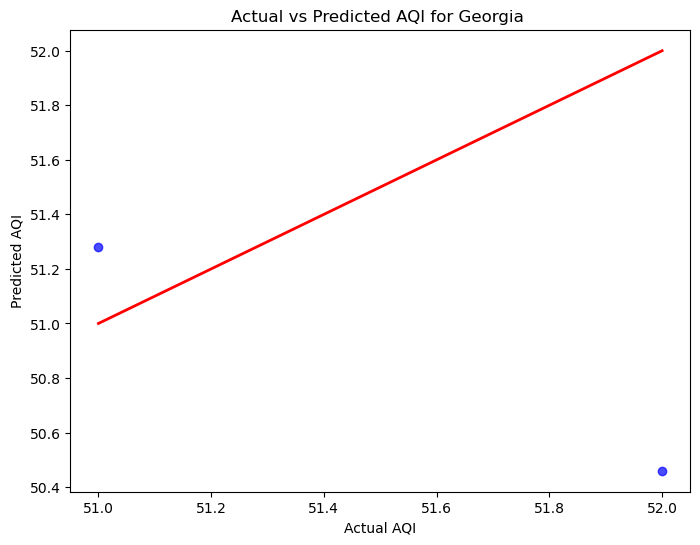

Model Performance for Georgia
Mean Squared Error: 1.224999999999999
Mean Absolute Error: 0.9100000000000001
R^2 Score: -3.899999999999996


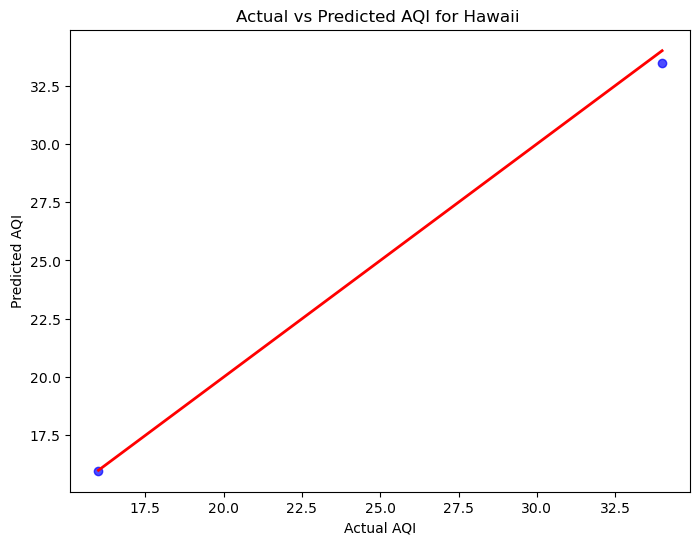

Model Performance for Hawaii
Mean Squared Error: 0.14065000000000058
Mean Absolute Error: 0.27500000000000036
R^2 Score: 0.9982635802469135


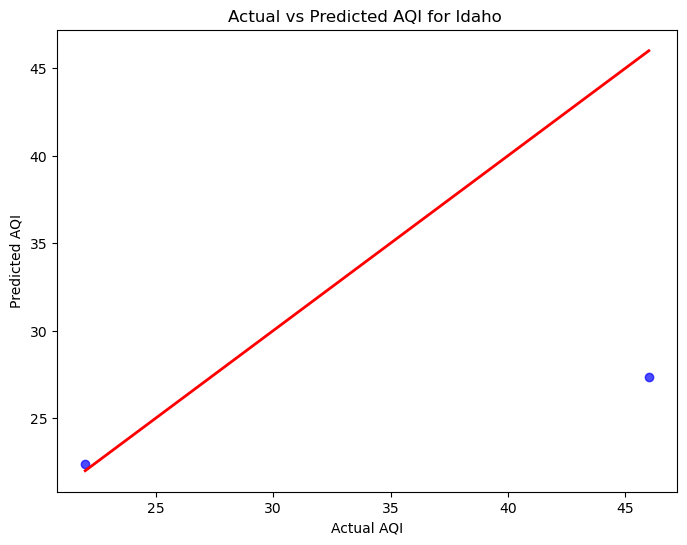

Model Performance for Idaho
Mean Squared Error: 173.61845
Mean Absolute Error: 9.514999999999999
R^2 Score: -0.20568368055555553


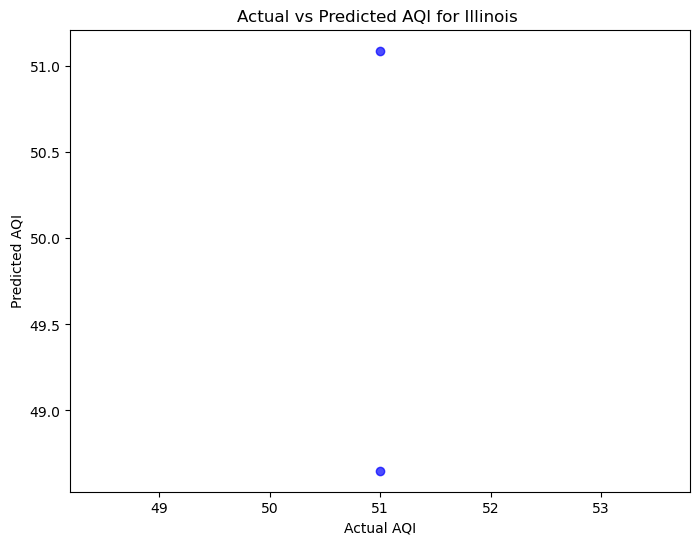

Model Performance for Illinois
Mean Squared Error: 2.765300000000004
Mean Absolute Error: 1.2200000000000024
R^2 Score: 0.0


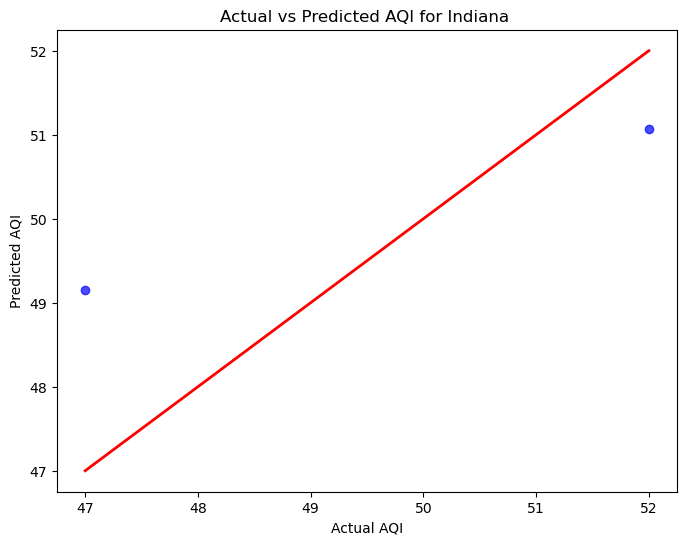

Model Performance for Indiana
Mean Squared Error: 2.743699999999997
Mean Absolute Error: 1.5399999999999991
R^2 Score: 0.5610080000000005


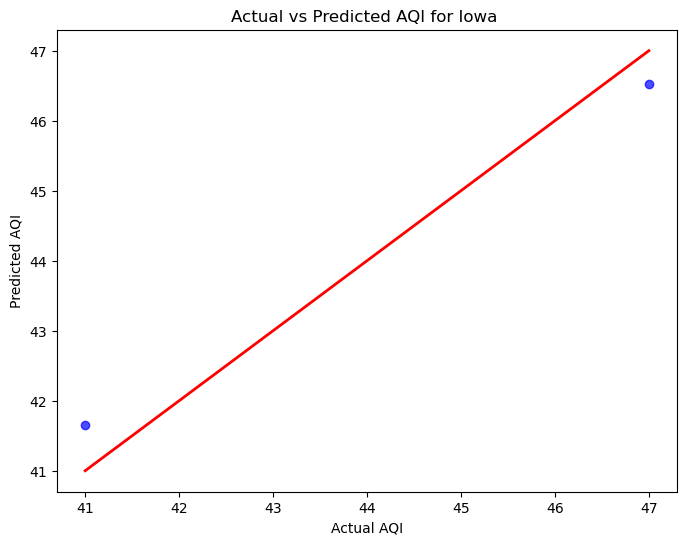

Model Performance for Iowa
Mean Squared Error: 0.33299999999999624
Mean Absolute Error: 0.5699999999999967
R^2 Score: 0.9630000000000004


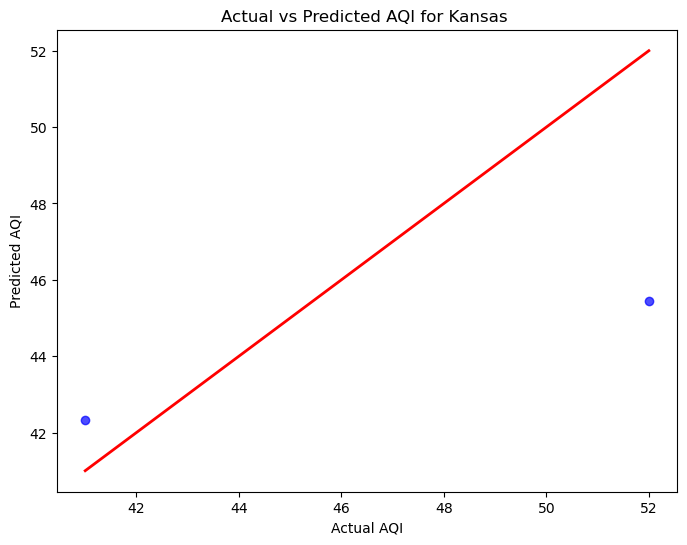

Model Performance for Kansas
Mean Squared Error: 22.388000000000016
Mean Absolute Error: 3.9400000000000013
R^2 Score: 0.25990082644628043


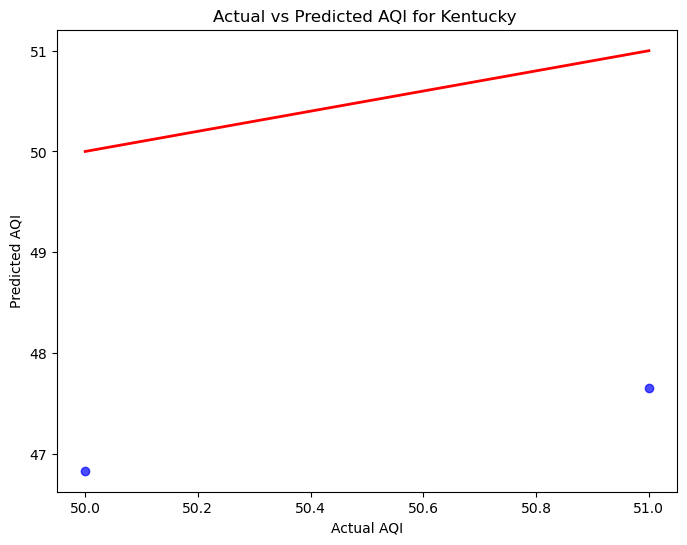

Model Performance for Kentucky
Mean Squared Error: 10.63570000000001
Mean Absolute Error: 3.2600000000000016
R^2 Score: -41.54280000000004


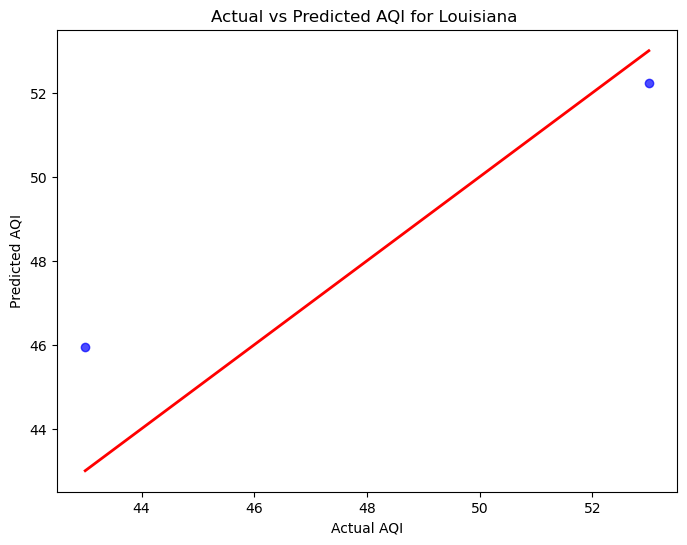

Model Performance for Louisiana
Mean Squared Error: 4.625999999999994
Mean Absolute Error: 1.8599999999999994
R^2 Score: 0.8149600000000002


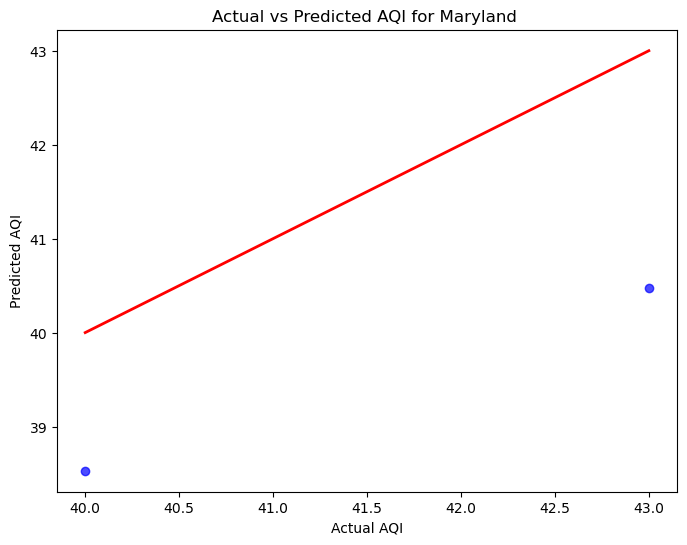

Model Performance for Maryland
Mean Squared Error: 4.255650000000006
Mean Absolute Error: 1.995000000000001
R^2 Score: -0.8914000000000029


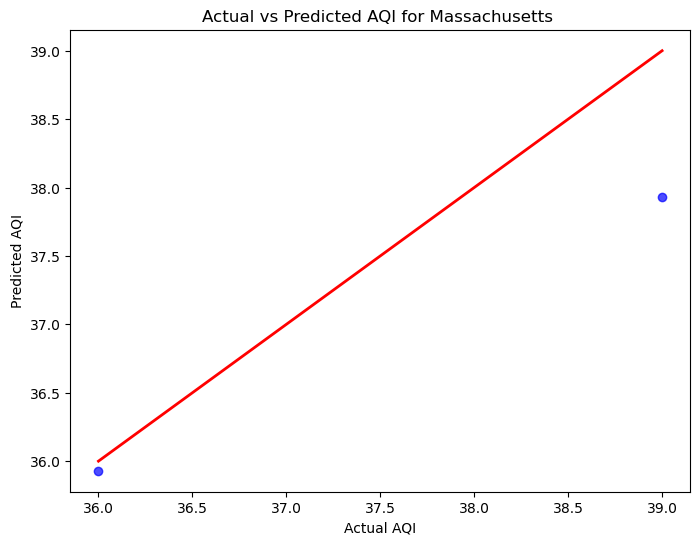

Model Performance for Massachusetts
Mean Squared Error: 0.5749000000000004
Mean Absolute Error: 0.5700000000000003
R^2 Score: 0.7444888888888888


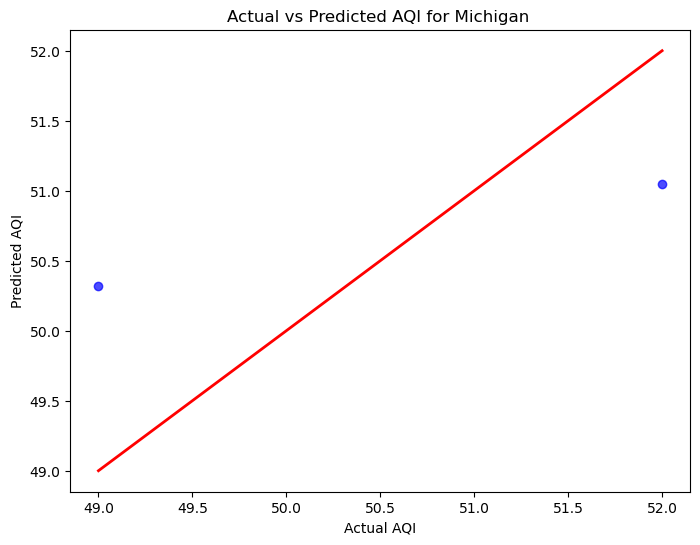

Model Performance for Michigan
Mean Squared Error: 1.322450000000003
Mean Absolute Error: 1.1350000000000016
R^2 Score: 0.4122444444444431


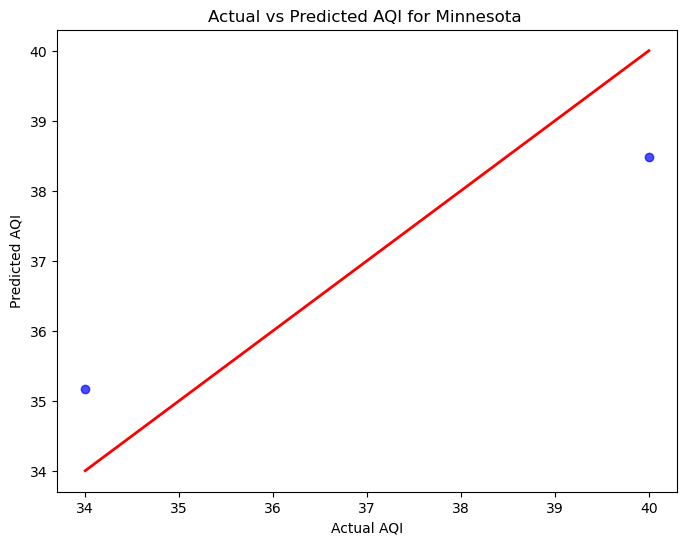

Model Performance for Minnesota
Mean Squared Error: 1.8396500000000067
Mean Absolute Error: 1.3450000000000024
R^2 Score: 0.7955944444444437


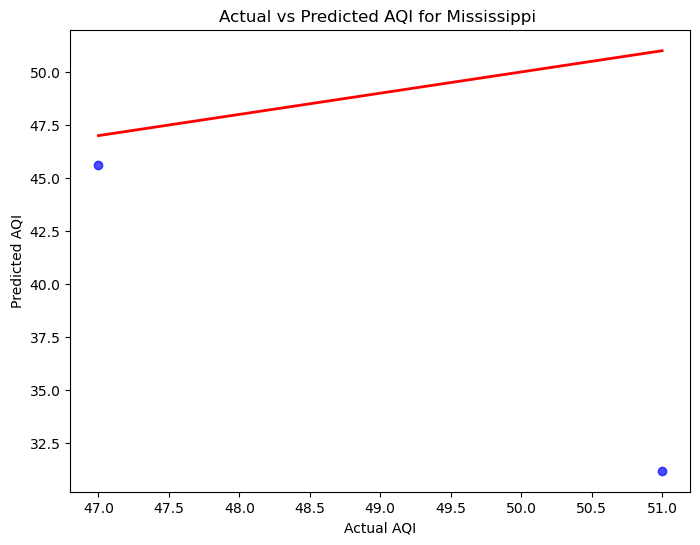

Model Performance for Mississippi
Mean Squared Error: 196.7881
Mean Absolute Error: 10.59
R^2 Score: -48.197025


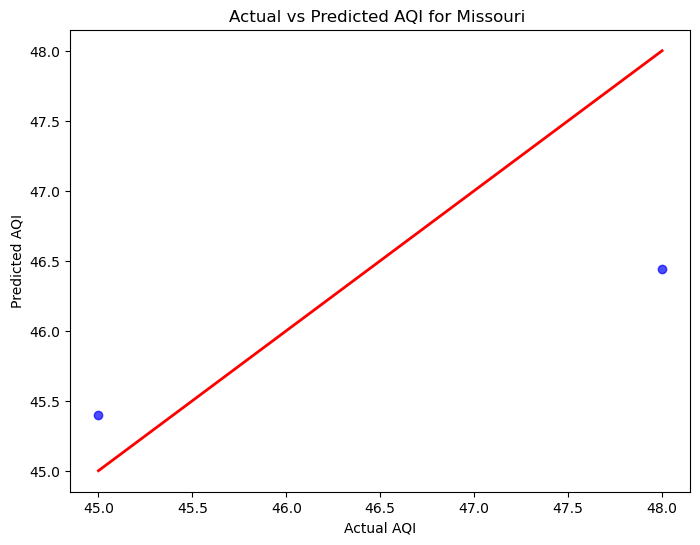

Model Performance for Missouri
Mean Squared Error: 1.296800000000003
Mean Absolute Error: 0.9800000000000004
R^2 Score: 0.42364444444444305


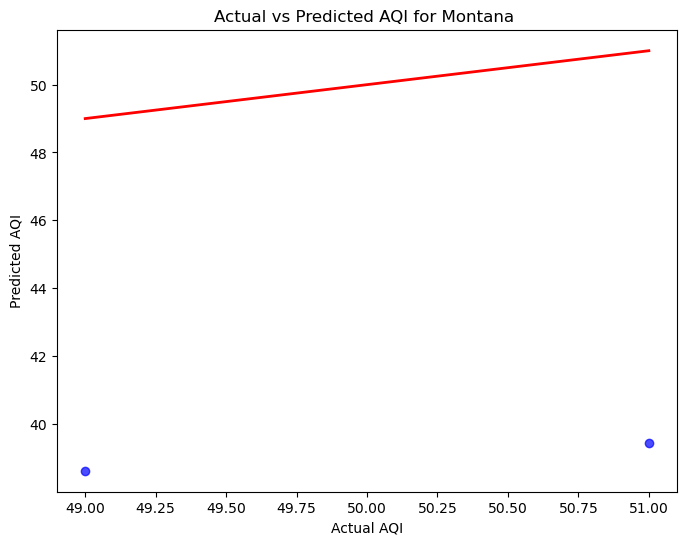

Model Performance for Montana
Mean Squared Error: 120.68900000000005
Mean Absolute Error: 10.970000000000002
R^2 Score: -119.68900000000005


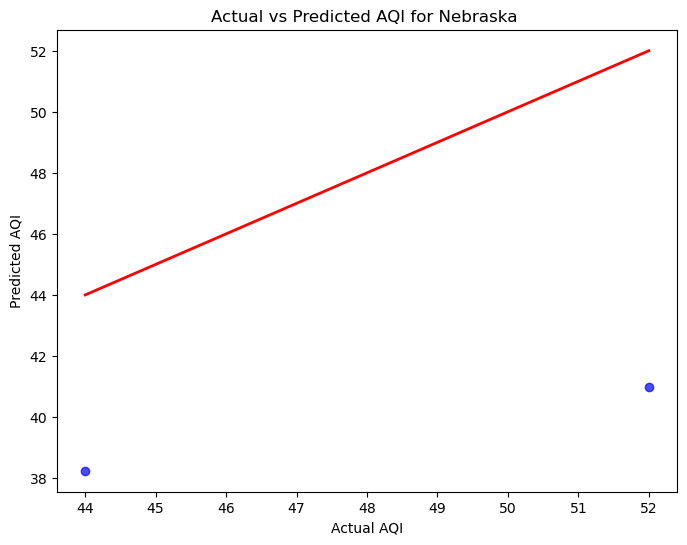

Model Performance for Nebraska
Mean Squared Error: 77.19884999999996
Mean Absolute Error: 8.384999999999998
R^2 Score: -3.824928124999998


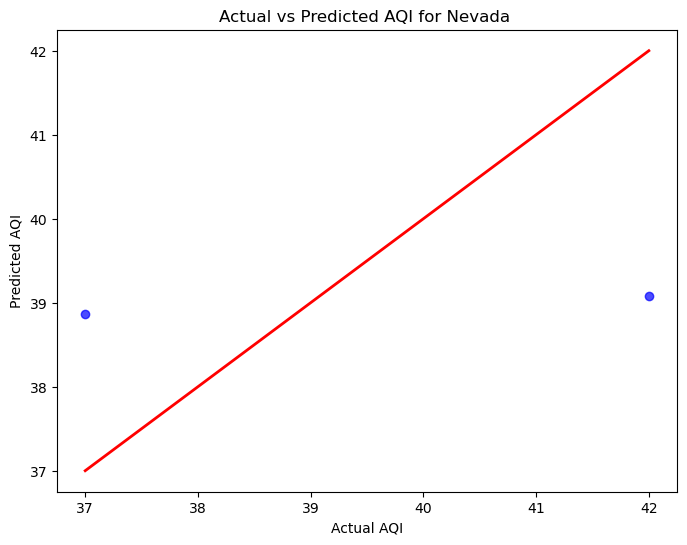

Model Performance for Nevada
Mean Squared Error: 6.0116499999999995
Mean Absolute Error: 2.3949999999999996
R^2 Score: 0.03813600000000006


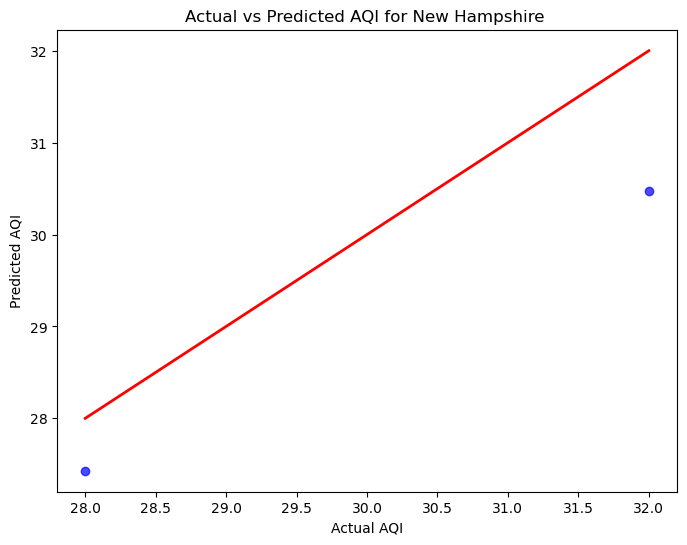

Model Performance for New Hampshire
Mean Squared Error: 1.332900000000002
Mean Absolute Error: 1.0500000000000007
R^2 Score: 0.6667749999999995


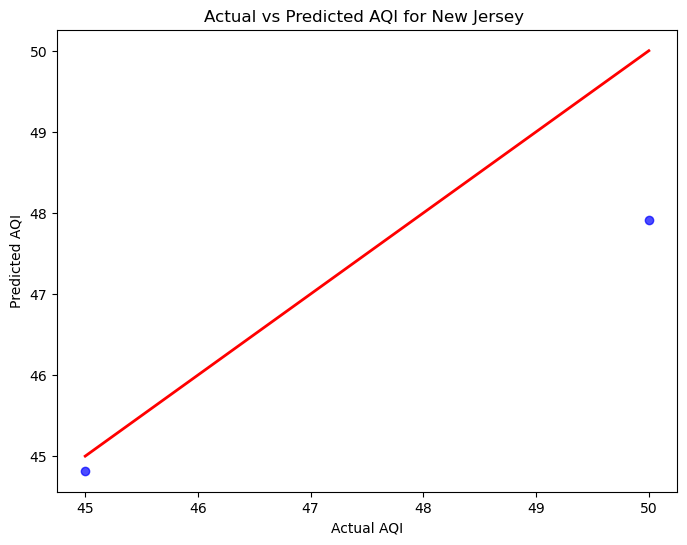

Model Performance for New Jersey
Mean Squared Error: 2.200250000000007
Mean Absolute Error: 1.1350000000000016
R^2 Score: 0.6479599999999989


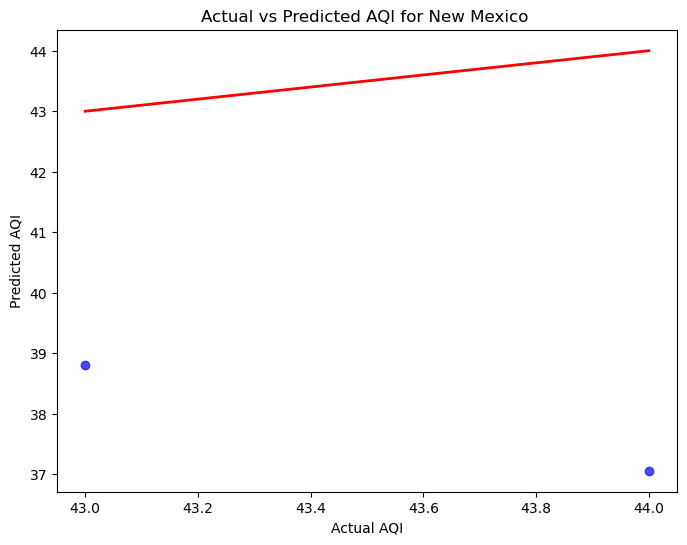

Model Performance for New Mexico
Mean Squared Error: 32.901799999999994
Mean Absolute Error: 5.57
R^2 Score: -130.60719999999998


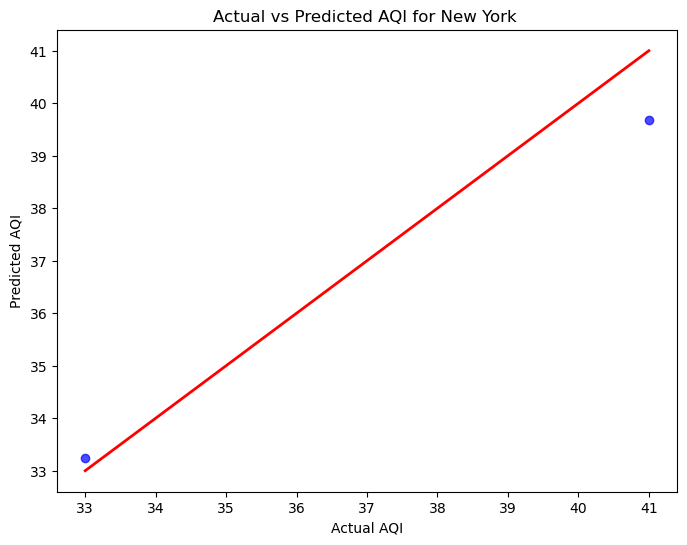

Model Performance for New York
Mean Squared Error: 0.9000000000000009
Mean Absolute Error: 0.7800000000000011
R^2 Score: 0.94375


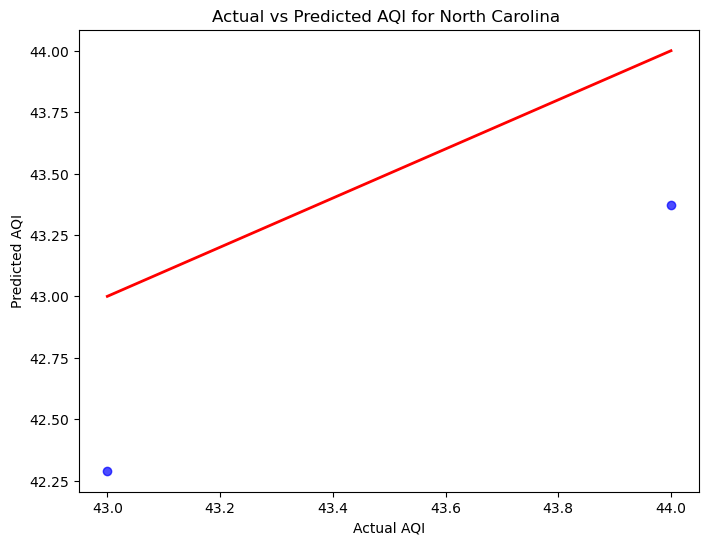

Model Performance for North Carolina
Mean Squared Error: 0.45050000000000223
Mean Absolute Error: 0.6700000000000017
R^2 Score: -0.8020000000000089


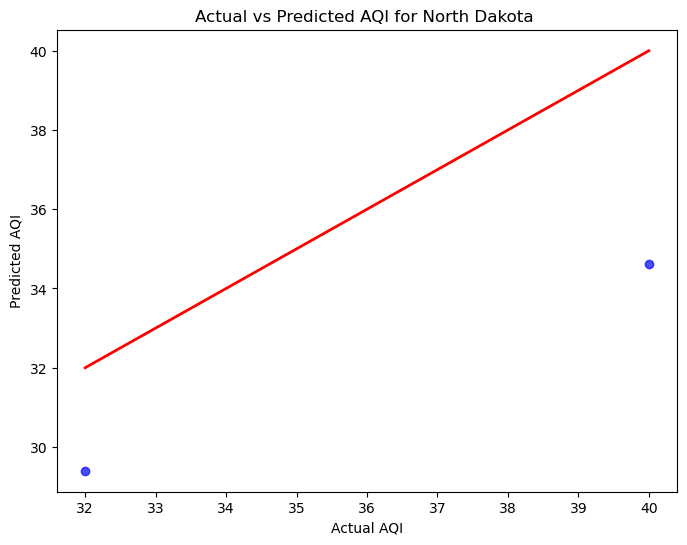

Model Performance for North Dakota
Mean Squared Error: 17.852200000000018
Mean Absolute Error: 3.990000000000002
R^2 Score: -0.1157625000000011


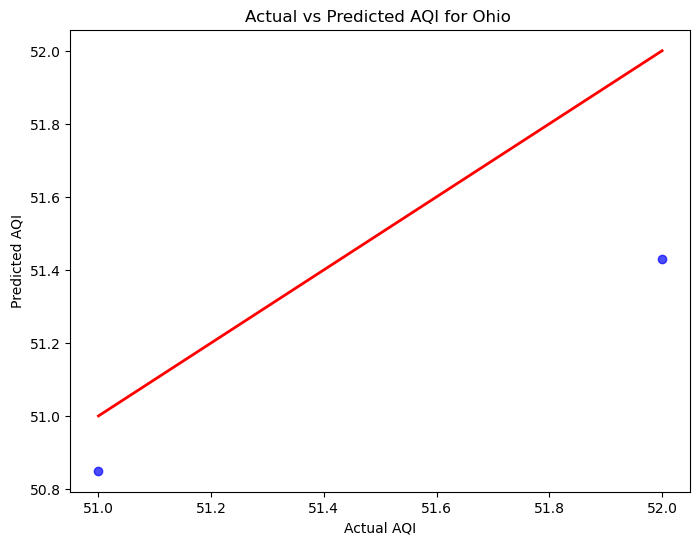

Model Performance for Ohio
Mean Squared Error: 0.17369999999999994
Mean Absolute Error: 0.35999999999999943
R^2 Score: 0.30520000000000025


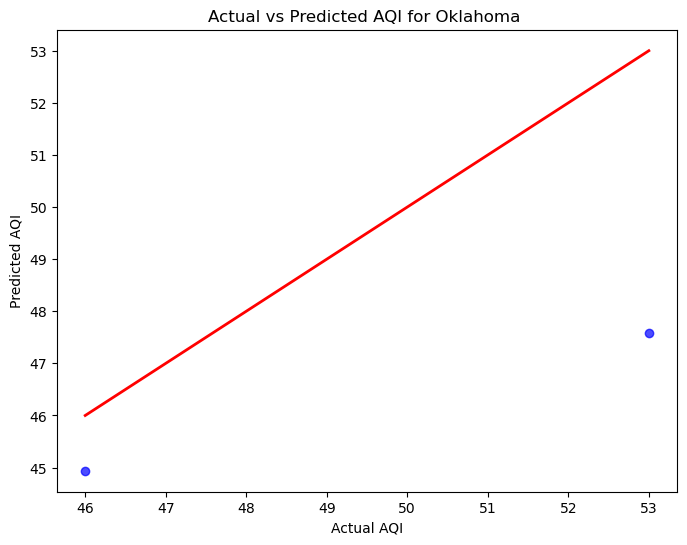

Model Performance for Oklahoma
Mean Squared Error: 15.195849999999982
Mean Absolute Error: 3.2349999999999994
R^2 Score: -0.2404775510204067


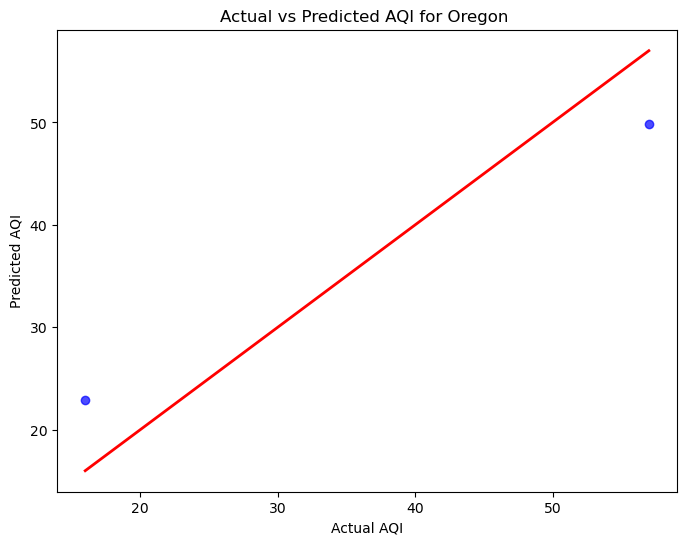

Model Performance for Oregon
Mean Squared Error: 50.07125000000001
Mean Absolute Error: 7.075000000000001
R^2 Score: 0.8808536585365854


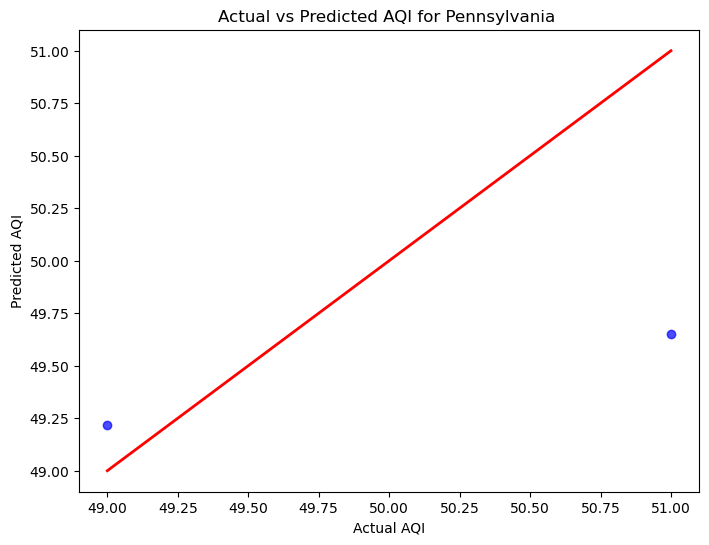

Model Performance for Pennsylvania
Mean Squared Error: 0.9354500000000017
Mean Absolute Error: 0.7850000000000001
R^2 Score: 0.06454999999999833


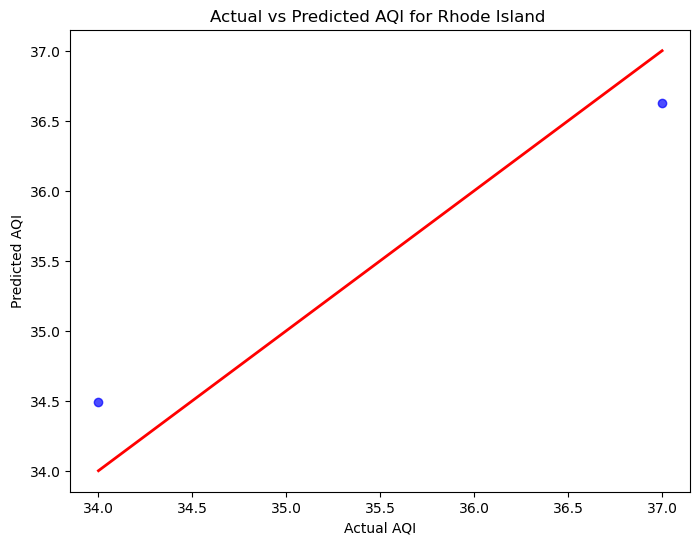

Model Performance for Rhode Island
Mean Squared Error: 0.18850000000000003
Mean Absolute Error: 0.4299999999999997
R^2 Score: 0.9162222222222223


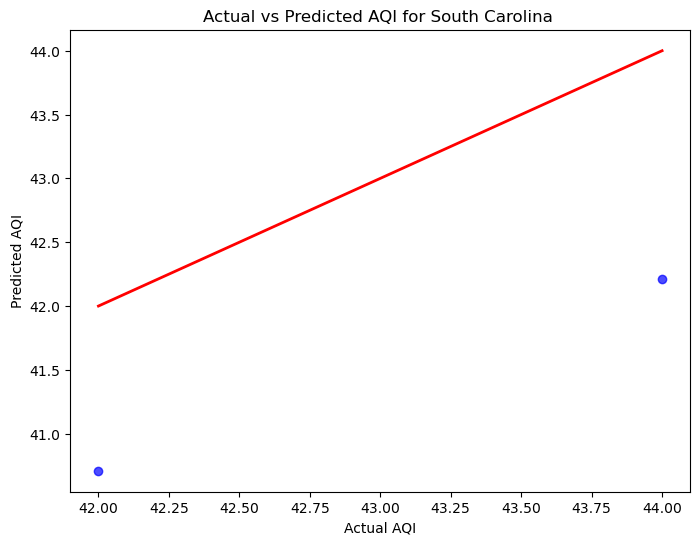

Model Performance for South Carolina
Mean Squared Error: 2.4340999999999973
Mean Absolute Error: 1.5399999999999991
R^2 Score: -1.4340999999999973


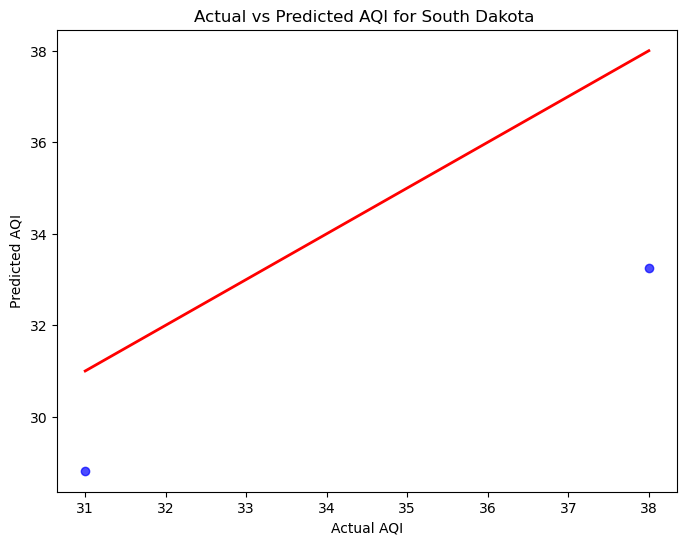

Model Performance for South Dakota
Mean Squared Error: 13.657449999999999
Mean Absolute Error: 3.465
R^2 Score: -0.11489387755102043


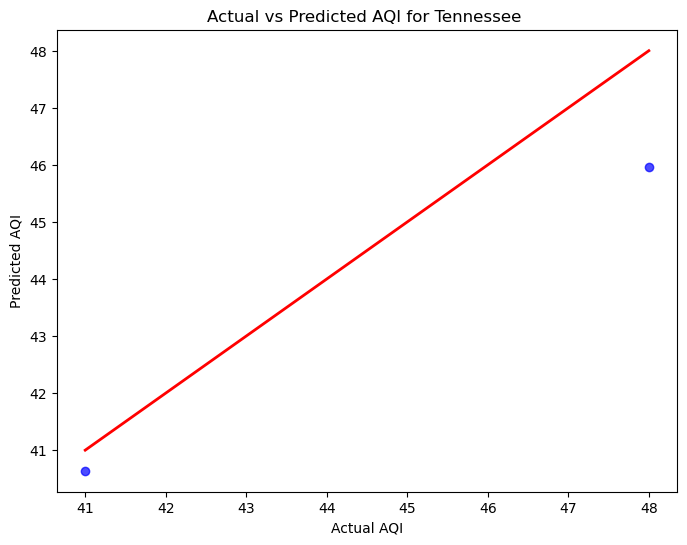

Model Performance for Tennessee
Mean Squared Error: 2.145599999999998
Mean Absolute Error: 1.1999999999999993
R^2 Score: 0.8248489795918369


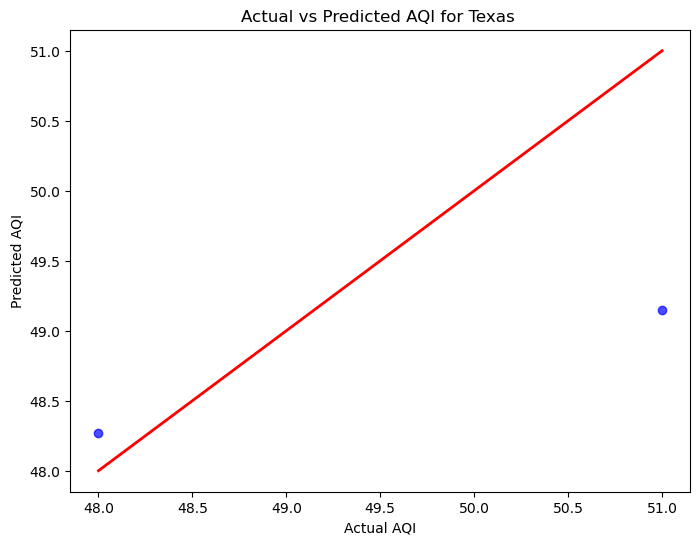

Model Performance for Texas
Mean Squared Error: 1.7477000000000034
Mean Absolute Error: 1.0600000000000023
R^2 Score: 0.2232444444444429


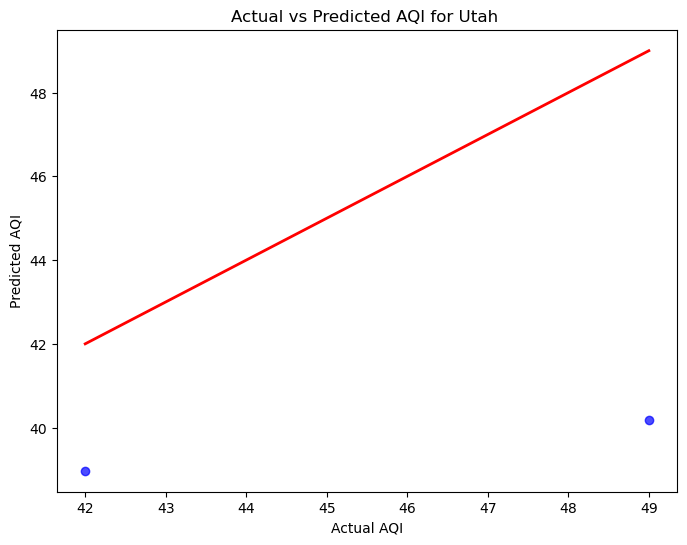

Model Performance for Utah
Mean Squared Error: 43.39850000000003
Mean Absolute Error: 5.920000000000002
R^2 Score: -2.542734693877553


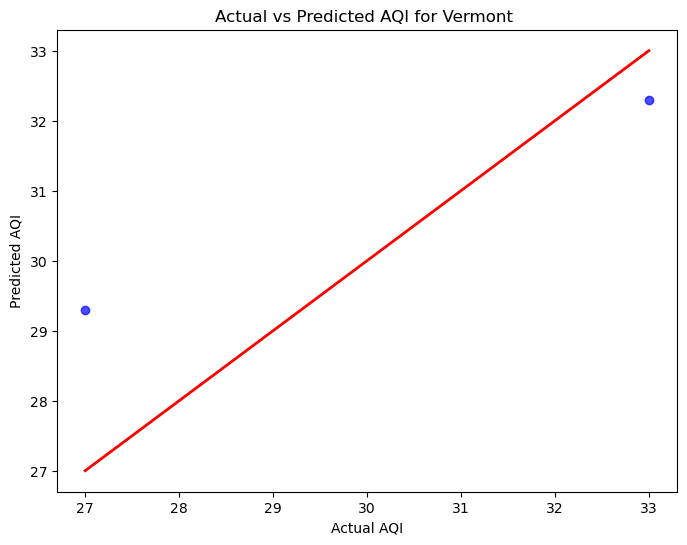

Model Performance for Vermont
Mean Squared Error: 2.8900000000000037
Mean Absolute Error: 1.5000000000000018
R^2 Score: 0.6788888888888884


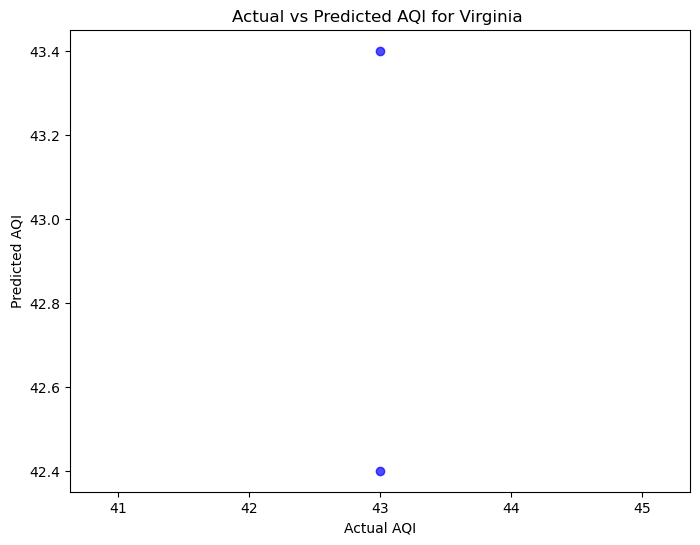

Model Performance for Virginia
Mean Squared Error: 0.2600000000000003
Mean Absolute Error: 0.5
R^2 Score: 0.0


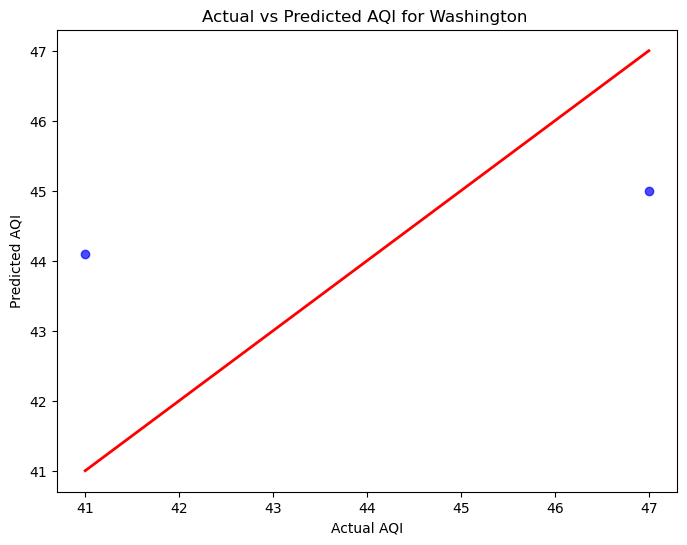

Model Performance for Washington
Mean Squared Error: 6.805000000000004
Mean Absolute Error: 2.5500000000000007
R^2 Score: 0.24388888888888838


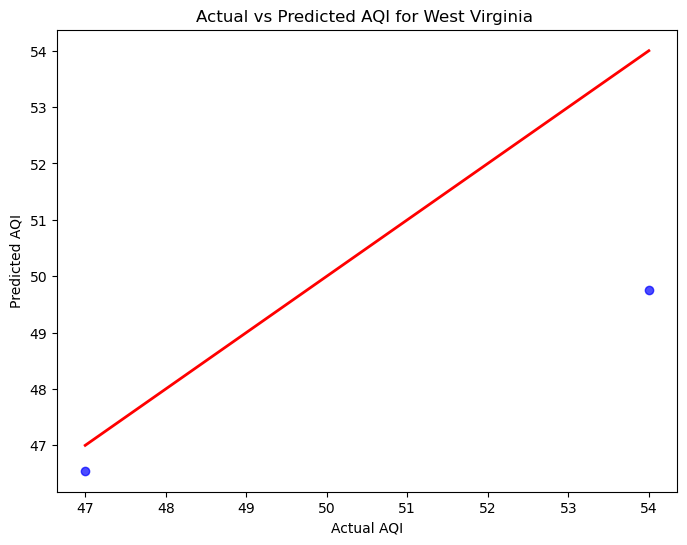

Model Performance for West Virginia
Mean Squared Error: 9.09005000000001
Mean Absolute Error: 2.3450000000000024
R^2 Score: 0.2579551020408155


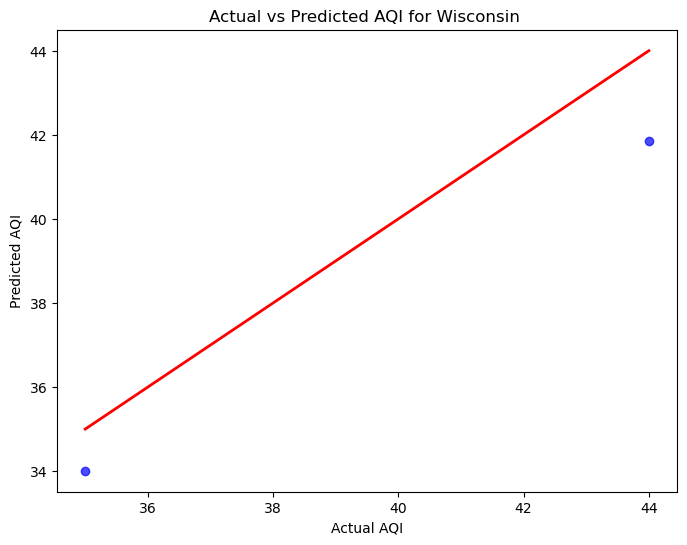

Model Performance for Wisconsin
Mean Squared Error: 2.801299999999999
Mean Absolute Error: 1.5700000000000003
R^2 Score: 0.8616641975308642


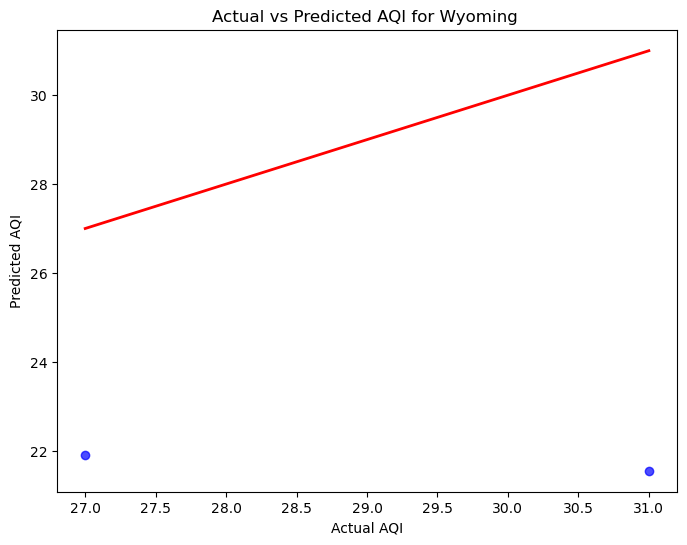

Model Performance for Wyoming
Mean Squared Error: 57.65625
Mean Absolute Error: 7.275
R^2 Score: -13.4140625


In [6]:
AQI_error = []
AQI_r2 = []
AQi_MAe = []
for state in states:
    mse, r2, mae = randomRF(state)
    AQI_error.append(mse)
    AQi_MAe.append(mae)
    AQI_r2.append(r2)

In [7]:
print(f"Overall mean MSE: {np.mean(AQI_error)}")
print(f"Overall mean Mae: {np.mean(AQi_MAe)}")
print(f"Overall mean R^2: {np.mean(AQI_r2)}")

Overall mean MSE: 24.201151020408165
Overall mean Mae: 3.034285714285715
Overall mean R^2: -7.292394142232935


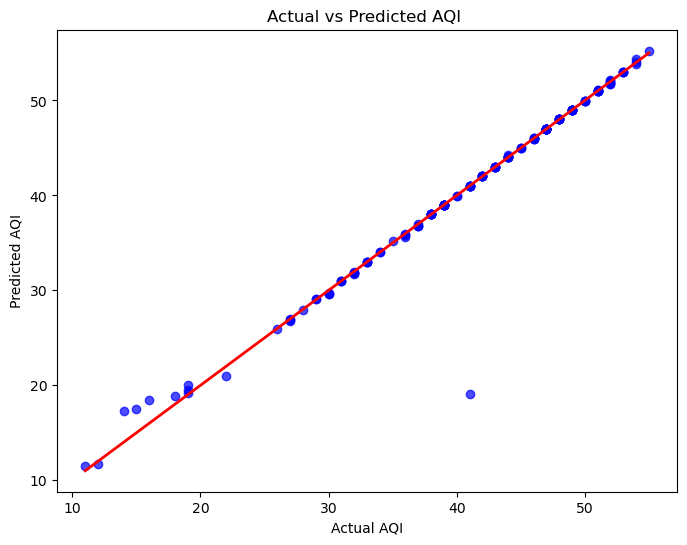

Model Performance 
Mean Squared Error: 3.1869243750000007
Mean Absolute Error: 0.26318750000000013
R^2 Score: 0.9638797243206413


In [11]:
#safedata = pd.read_csv('../Processed_Data/AQI_Final.csv')
data = pd.read_csv('../Processed_Data/AQI_Final.csv')
# Filter the state
#data = data[data['State Name'] == State_Name]

# Drop non-numeric and irrelevant columns for prediction (e.g., 'State Name' and 'Year')
#safedata = safedata.drop(columns=[ 'Unknown Fuel','Ethanol/Flex (E85)', 'Diesel', 'Hybrid Electric (HEV)', 
#                        'Electric (EV)','Biodiesel' ,'Compressed Natural Gas (CNG)', 'Gasoline', 'Plug-In Hybrid Electric (PHEV)', ])

data = data.drop(columns=[ 'Year','State Name', ])

# Check for missing values and fill or drop them as needed
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.mean())  # Fill missing values with column means (alternative: data.dropna())

# Split data into features (X) and target (y)
X = data.drop(columns=['Overall AQI'])  # Features
y = data['Overall AQI']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=500)

# Standardize features to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title(f'Actual vs Predicted AQI ')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance ")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Optional: Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=data.drop(columns=['Overall AQI']).columns, columns=['Importance']).sort_values('Importance', ascending=False)
#print("\nFeature Importances:")
#print(feature_importances)
merge = pd.merge(safedata,data, how='inner')
#print(merge)


In [13]:
data.columns

Index(['Ozone Average', 'Carbon Average', 'Nitrogen Average', 'Sulfur Average',
       'PM2.5 Average', 'PM10 Average', 'Ozone AQI', 'Carbon AQI',
       'Nitrogen AQI', 'Sulfur AQI', 'PM2.5 AQI', 'PM10 AQI', 'Overall AQI',
       'Population', 'Renewable Vehicles', 'Non-Renewable Vehicles'],
      dtype='object')

In [ ]:
featured_columns = ['Ozone Average', 'Carbon Average', 'Nitrogen Average', 'Sulfur Average',
       'PM2.5 Average', 'PM10 Average', 'Ozone AQI', 'Carbon AQI',
       'Nitrogen AQI', 'Sulfur AQI', 'PM2.5 AQI', 'PM10 AQI', 'Overall AQI',
       'Population', 'Renewable Vehicles', 'Non-Renewable Vehicles']

input = ['Ozone Average', 'Carbon Average', 'Nitrogen Average', 'Sulfur Average',
       'PM2.5 Average', 'PM10 Average', 'Ozone AQI', 'Carbon AQI',
       'Nitrogen AQI', 'Sulfur AQI', 'PM2.5 AQI', 'PM10 AQI', 'Overall AQI',
       'Population', 'Renewable Vehicles', 'Non-Renewable Vehicles']



In [14]:
def predict_aqi(inputs, model, scaler, feature_columns):
    input_df = pd.DataFrame([inputs], columns=feature_columns)
    input_df = input_df.fillna(0)  # Ensure all columns have values
    input_scaled = scaler.transform(input_df)
    predicted_aqi = model.predict(input_scaled)
    return predicted_aqi[0]

In [36]:
state_name = "New York"  # Example state
population = 1500  # / 1000
non_renewable_vehicles = 9956000  # Example number of non-renewable vehicles

predicted_aqi = predict_aqi(state_name, population, non_renewable_vehicles, randomRF, data)
print(f"Predicted AQI for {state_name}: {predicted_aqi}")

KeyError: "None of [Index(['State Name'], dtype='object')] are in the [columns]"